# Plane Waves

All information in this notebook originates from the following document:
http://karin.fq.uh.cu/qct/MMN/extras/plane_waves.pdf

<br>

By definition, a plane wave is a wave with constant frequency that has infinite parallel planes that are normal to the velocity vector of the wave. It is impossible to have a plane wave in real life, but certain waves in localized regions of space do approximately act as plane waves. 

<br>

A wave similar to a plane wave can be defined with the $sin$ and $cos$ functions. Using the $cos$ function a plane wave can be defined as follows:
                    $$A(r,t)=A_0cos(\vec k\cdot \vec r - \omega t + \varphi)$$

<br>
$A(r,t)$ is the magnitude/disturbance of the wave at a given point in space and time <br>
$A_0$ is the magnitude of the wave in graph units. <br>
$\vec k$ is the wave vector, and and has a magnitude equal to $\frac{2\pi}{\lambda}$, with $\lambda$ being the wavelength of the wave. <br>
$\vec r$ is the 3D position vector of the wave. <br>
$\omega$ is the angular frequency of the wave, equal to $\frac{2\pi}{T}$, with $T$ being the period of the wave in seconds. <br>
$t$ is a point in time, with units of seconds. <br>
$\varphi$ is the phase shift of the wave, in units of radians. <br>


In [1]:
import sys
sys.path.append("..\\Comp_Chem_Package")
from vector import vector
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#connect plotly to the Juypter notebook
init_notebook_mode(connected=True)

#Define all user set variables here
A0 = 5
k = vector(0, 2, 0)
r = vector(0,0,0)
w = 1
psi = 0

#start and stop times for the simulation
t = 0
endT = 5

#timestep for the simulation
dt = 0.09

#variables used for graphing purposes
#WAVES MUST BE AN INTEGER!!
waves = 5
waveDelta = vector(1,0,1)
xData = []
yData = []
zData = []
amplitude = []

#force waves to be an integer
waves = int(waves)

#compute the wavelength and period for the wave
y = 2 * np.pi / k.magnitude()
T = 2 * np.pi / w

#main while loop for the program
while(t <= endT):

    amplitude.append( A0 * np.cos( (k * r) - (w*t) + psi) )
    
    for wave in range(waves):
        rGraph = (r + (waveDelta * wave)) * amplitude[len(amplitude) - 1]
        xData.append(r.x)
        yData.append(r.y)
        zData.append(rGraph.z)
        
        xData.append(r.x)
        yData.append(rGraph.y)
        zData.append(r.z)
    
    #compute the distance the wave has transversed in the amount of time that has passed
    #multiply the time passed by the wave length to get distance * seconds
    #divide distance * seconds by the period of the wave in seconds to arrive at the distance 
    #the wave has traveled in the specified amount of time
    deltaPosition = (t * y) / T
    
    #add the delta position to the current position of the wave by determing how much the wave is 
    #in each direction of the wave vector
    r += (k * deltaPosition)
    
    #increment the timestep 
    t += dt

In [2]:
#function to create an animation frame for the simulation
def frame(x, y, z):

    return {
        
        "data" : [
            {
                "type" : "scatter3d",
                "x":x, 
                "y":y,
                "z":z
            }
        ]
    }

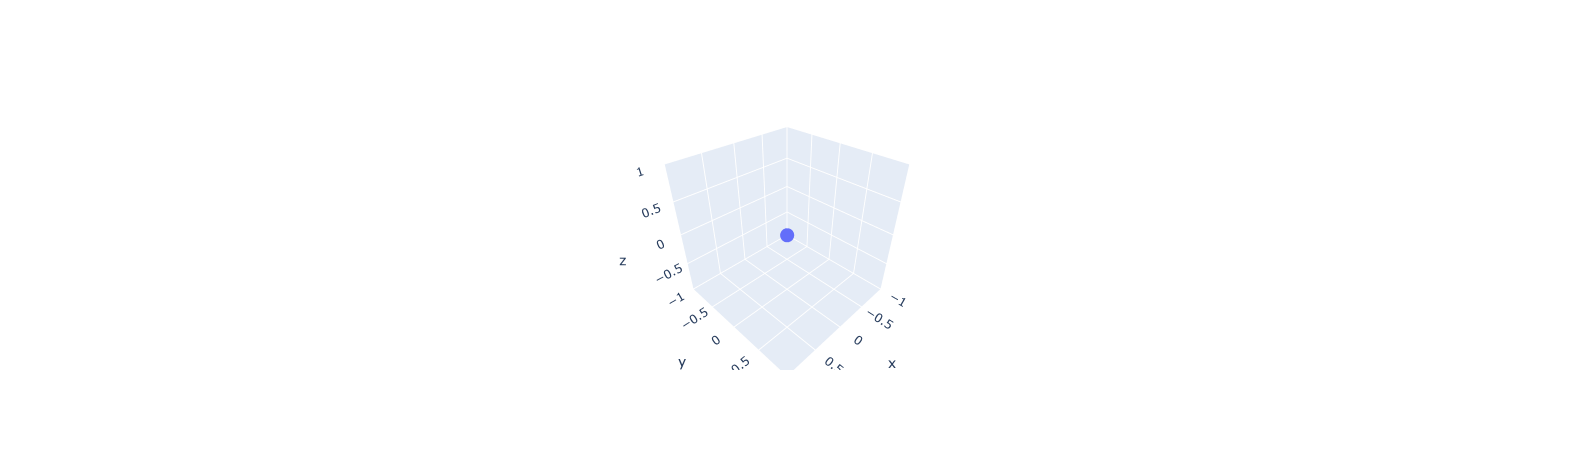

In [3]:
#create an animated plane wave
frames = []
waves *= 2
for i in range(len(xData) // waves):
    frames.append( frame( xData[0:i*waves], yData[0:i*waves], zData[0:i*waves]) )

figure = {
    "frames" : frames, 
    "data": [
        {
            "type" : "scatter3d",
            "connectgaps":False,
            "x":[0],
            "y":[0],
            "z":[0]
        }
    ]
}

iplot(figure)